In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../utils')
print(sys.path)
import numpy as np
from load_dataset import *
import os

['/home/shiqi/code/model_combination_Argos/pca_from_formulation', '/home/shiqi/anaconda3/envs/torch/lib/python39.zip', '/home/shiqi/anaconda3/envs/torch/lib/python3.9', '/home/shiqi/anaconda3/envs/torch/lib/python3.9/lib-dynload', '', '/home/shiqi/anaconda3/envs/torch/lib/python3.9/site-packages', '../utils']


In [4]:
import yaml

config_path = '/home/shiqi/code/model_combination_Argos/pca_from_formulation/output/experiment_10/config.yaml'
with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

In [5]:
import torch

# Save dir
save_dir = config['save_dir']
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

# todo: multi nu
nu_list = config['nu_list']

# Data loader
x_dataset, u_dataset, nu_dataset = [], [], []
for i in range(len(nu_list)):
    nu = nu_list[i]
    config['data_dir'] = config['data_dir_list'][i]
    x_data, u_data, nu_data, n_features, n_inputs = data_preparation_xu(config, nu_list, nu)
    x_dataset.append(x_data)
    u_dataset.append(u_data)
    nu_dataset.append(nu_data)
    print(np.max(x_data))
    print(np.min(x_data))
    print(nu_data.shape)
    print(nu_data[1, :])

Device: cuda
2.251169363651072
-2.263121094224531
(7450, 3)
[1. 0. 0.]
6.742559001618681
-6.831994222487539
(7152, 3)
[0. 1. 0.]
8.593838849130764
-8.715203460430647
(7301, 3)
[0. 0. 1.]


In [8]:
from sklearn.preprocessing import StandardScaler
scaler_x_set = []
x_dataset_scaled = []
for x_data in x_dataset:
    scaler_x = StandardScaler()
    x_data = scaler_x.fit_transform(x_data)
    x_dataset_scaled.append(x_data)
    scaler_x_set.append(scaler_x)

In [9]:
x_data_scaled = np.concatenate(x_dataset_scaled, axis=0)
x_data_scaled.shape

(21903, 6957)

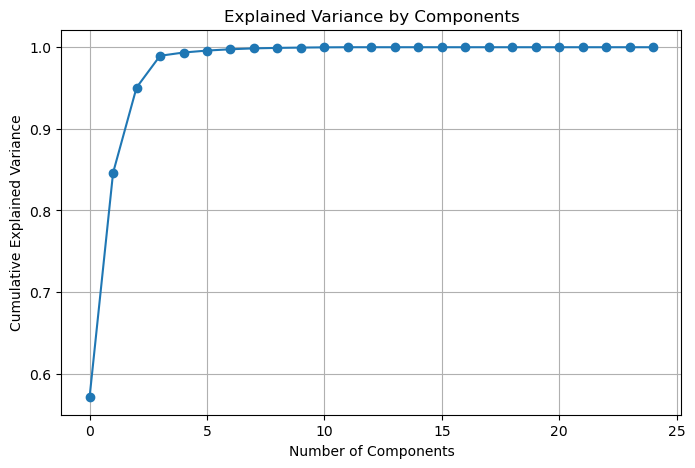

In [15]:
# 初始化PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=25)  # 选择一个初始的维度数目，例如100
x_pca = pca.fit_transform(x_data_scaled)

# 解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 可视化累积解释方差
plt.figure(figsize=(8, 5))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# plt.yscale('log')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


In [16]:
cumulative_explained_variance

array([0.57110286, 0.84608211, 0.95059299, 0.98950508, 0.99350653,
       0.99589492, 0.99750861, 0.99859403, 0.99918134, 0.9995591 ,
       0.99984875, 0.99999497, 0.99999769, 0.99999842, 0.99999906,
       0.99999935, 0.9999995 , 0.99999963, 0.9999997 , 0.99999975,
       0.99999981, 0.99999983, 0.99999986, 0.99999988, 0.9999999 ])

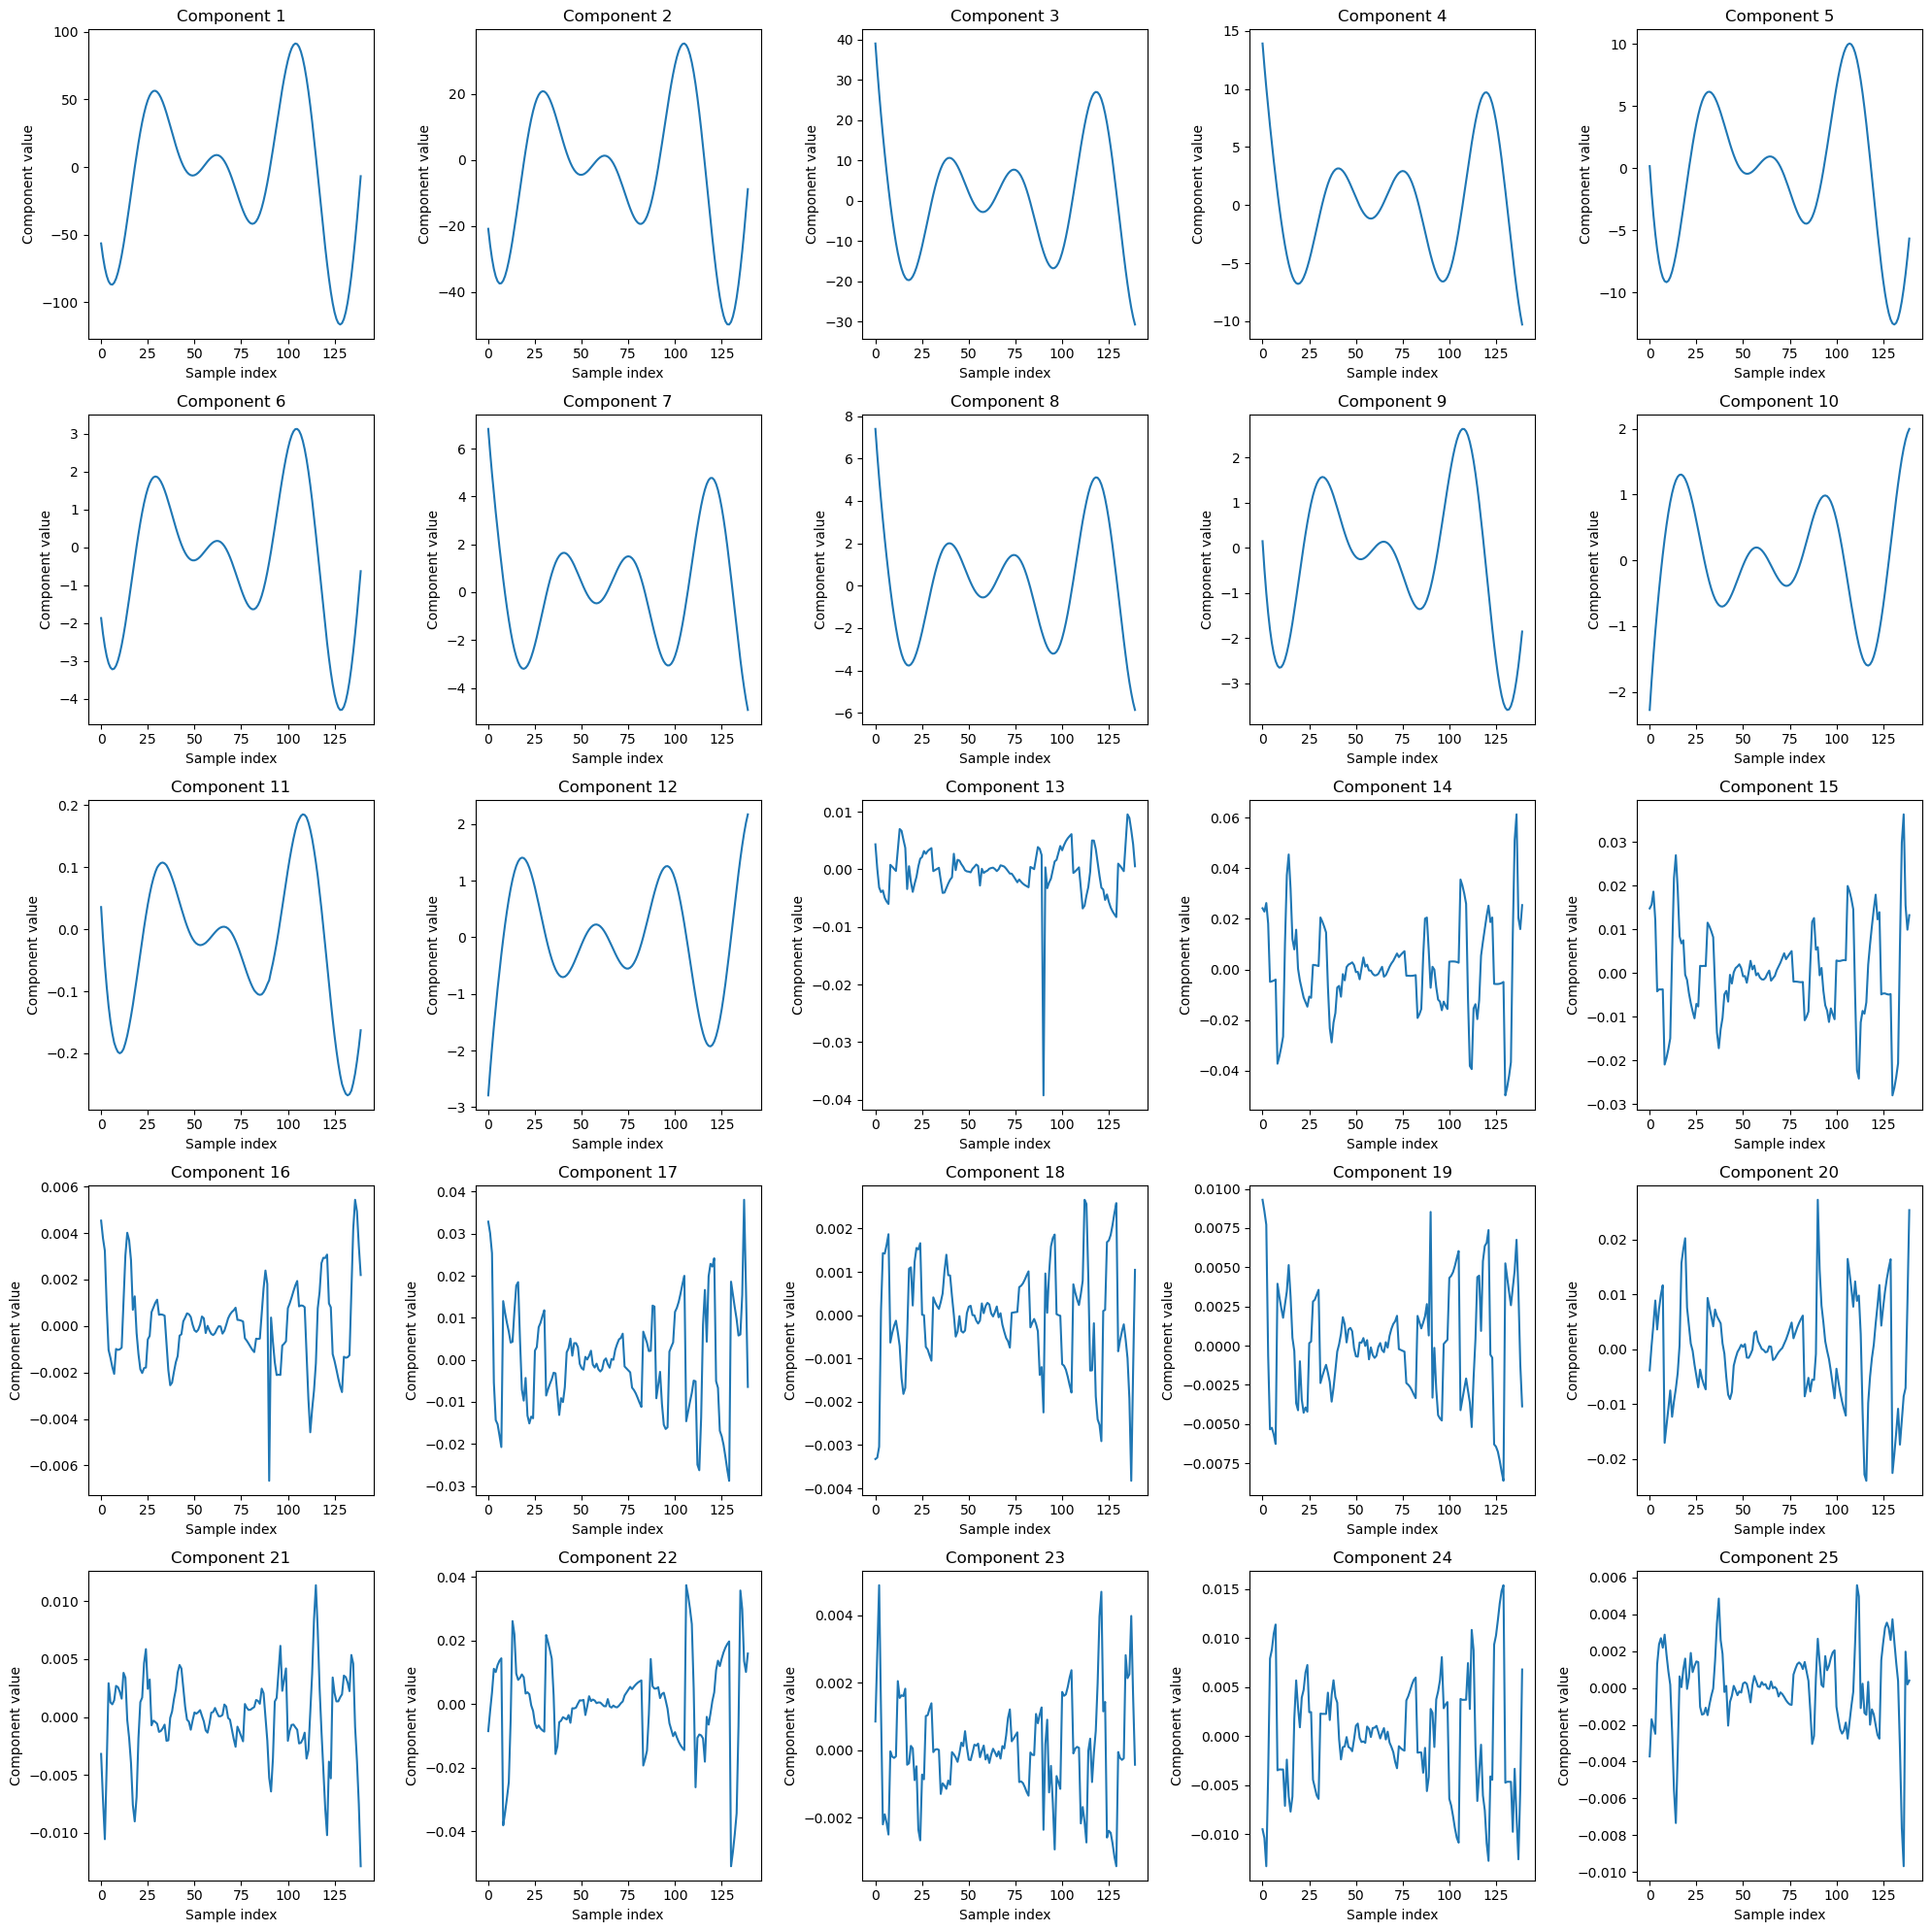

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Plotting the first 150 samples of each PCA component in a row of 5 subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
for i in range(25):
    row = i // 5  # Determining the row of the subplot
    col = i % 5   # Determining the column of the subplot
    axes[row, col].plot(x_pca[:140, i])  # Corrected to plot with dots for clarity
    axes[row, col].set_title(f'Component {i+1}')
    axes[row, col].set_xlabel('Sample index')
    axes[row, col].set_ylabel('Component value')

plt.tight_layout()
plt.show()
